<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week4/day5/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings

In [3]:
data = pd.read_csv('survey.csv')

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [7]:
data_missing = pd.DataFrame(index = data.columns.values)

In [8]:
data_missing['Null'] = data.isnull().sum().values
data_missing

,Null
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [9]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [13]:
data[data['Country'] == 'United States']['state'].value_counts().head()

CA    138
WA     70
NY     56
TN     45
TX     44
Name: state, dtype: int64

In [18]:
unique_gender = data['Gender'].str.lower().unique()

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male",
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)

    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)

    if str.lower(col['Gender']) in trans_str:
        data['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)


stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


In [22]:
# data[data['Gender'] == 'female'].value_counts().head()

In [24]:
# data[data['Gender'] == 'trans'].value_counts().head()

In [23]:
# data[data['Gender'] == 'male'].value_counts().head()

In [25]:
data['treatment'].value_counts()

Yes    635
No     622
Name: treatment, dtype: int64

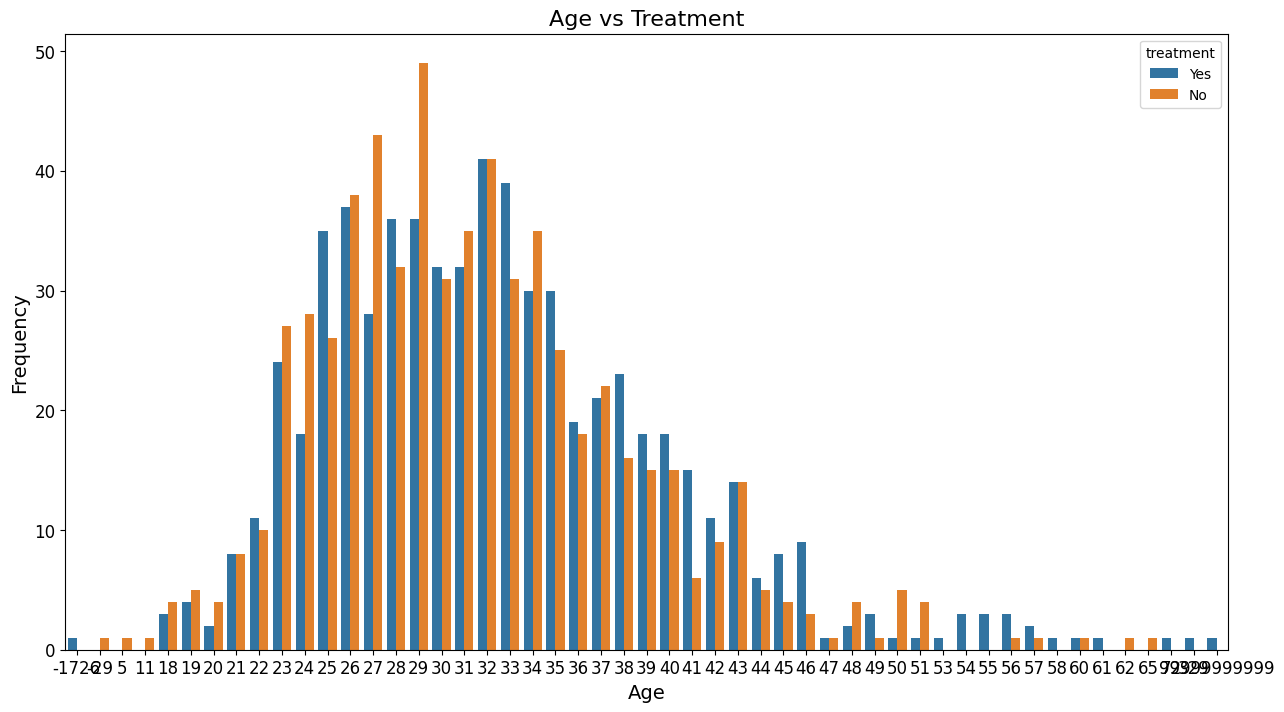

In [28]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=data)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

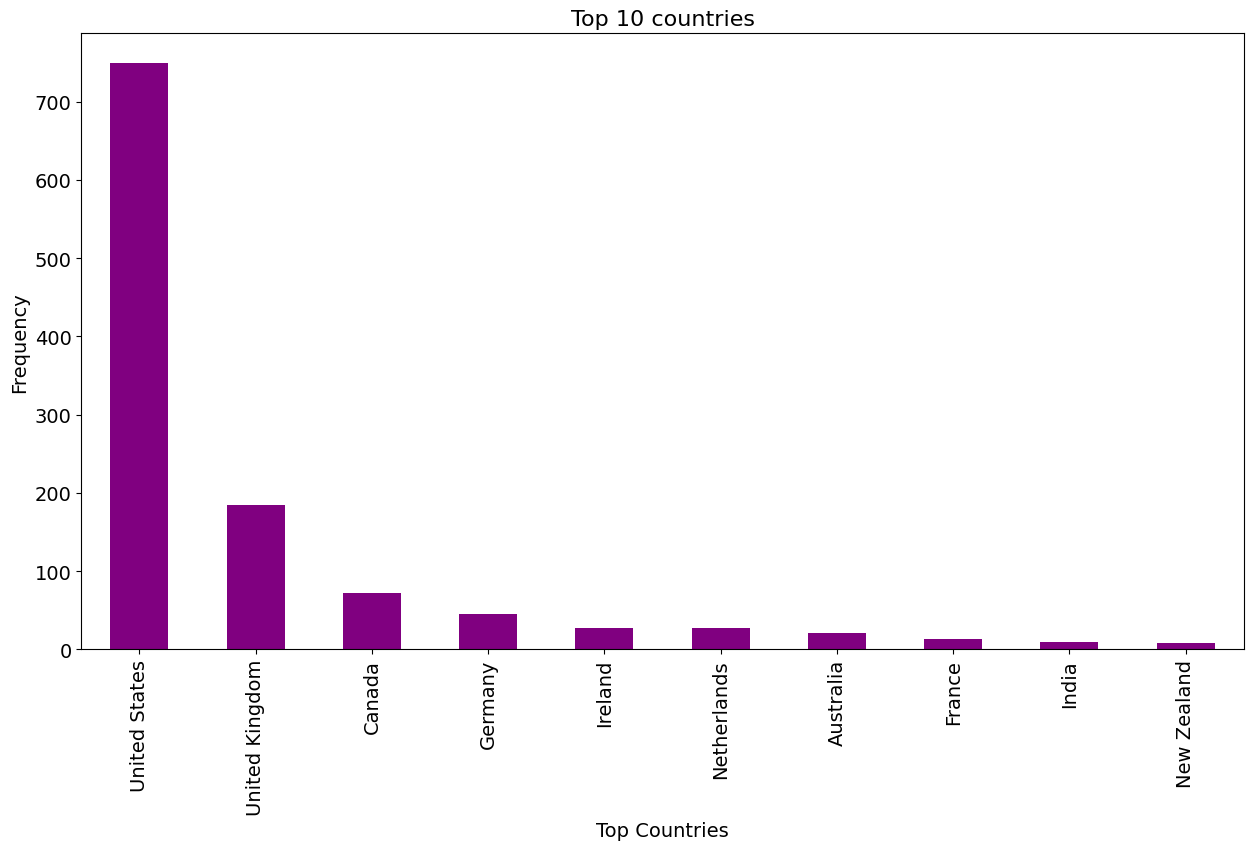

In [30]:
fig = plt.figure(figsize=[15,8])

data['Country'].value_counts().head(10).plot.bar(color='purple')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()